### Problem:
The images are in different orientations: upright 'in label:' rotated_right ',' rotated_left ',' upside_down 'and' upright '.

### Solution: 
A neural network must be trained to solve the test problem. There is a train.csv file that contains a column called label (the learning algorithm) and in the fn column the name of the file (extraction of characteristics). The images must be opened as a vector, so that NN can obtain the characteristics. In this case, supervised learning should be used due to needing to learn the difference between the positions of the images.

# Attempt 1- Image classification from keras

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

import gc

In [2]:
train_imgs = pd.read_csv('./train.csv')

In [3]:
train_imgs.head(10)

fn          label
0  0-10049200_1891-09-16_1958.jpg   rotated_left
1  0-10110600_1985-09-17_2012.jpg   rotated_left
2  0-10126400_1964-07-07_2010.jpg        upright
3   0-1013900_1917-10-15_1960.jpg  rotated_right
4  0-10166400_1960-03-12_2008.jpg    upside_down
5    0-102100_1970-10-09_2008.jpg   rotated_left
6   0-1024100_1982-06-07_2011.jpg   rotated_left
7  0-10292500_1984-03-26_2009.jpg   rotated_left
8   0-1035700_1945-11-27_2013.jpg    upside_down
9  0-10416800_1907-01-08_1967.jpg        upright

In [4]:
#train_imgs['fn'][0:5]

In [5]:
#train_imgs['fn'][2]

View images

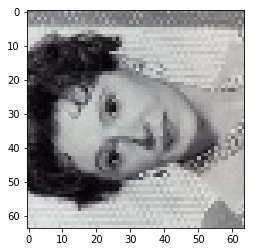

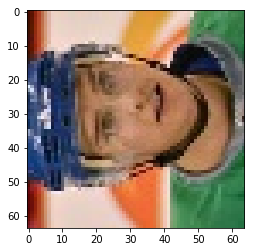

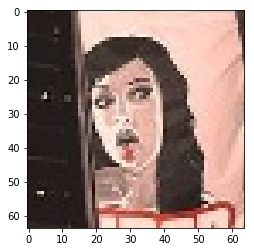

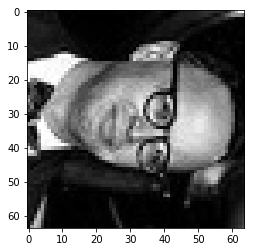

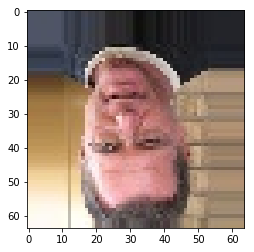

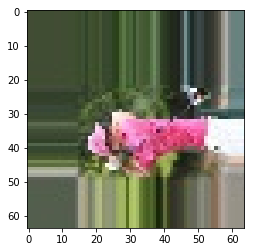

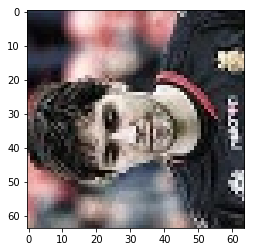

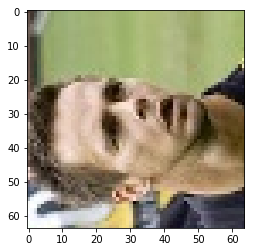

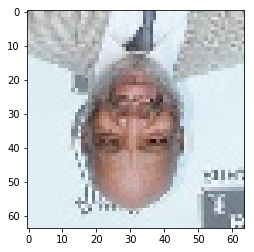

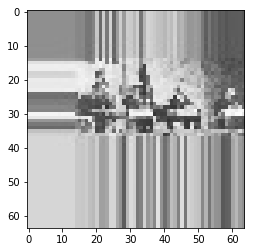

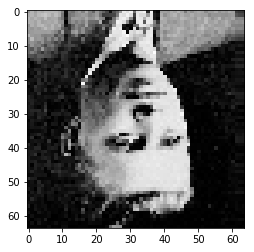

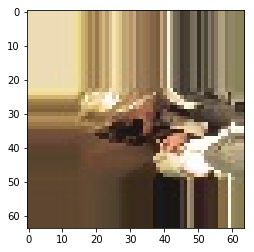

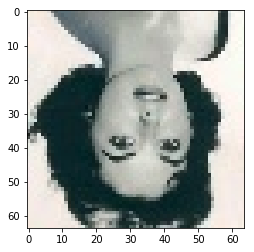

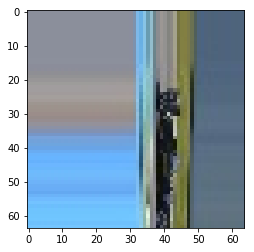

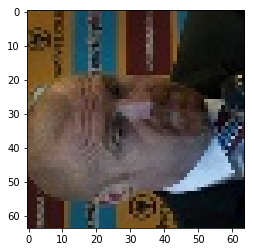

In [6]:
import matplotlib.image as mpimg

for ima in train_imgs['fn'][0:15]:
    img = mpimg.imread('./train/'+ima)
    imgplot = plt.imshow(img)
    plt.show()

Function to separate the characteristics of the images of the learning

In [7]:
def read_and_process_image(lista_img,lista_lab):
    
    
    X = []
    y =[]
    
    for image,label in zip(lista_img,lista_lab):
        
        X.append(mpimg.imread('./train/'+image))# Ler imagem em vetor
        
        # Change string to int (upright = 0, right = 1, left = 2, upside down =3)
        if 'upright' in label:
            y.append(0)
        elif 'rotated_right' in label:
            y.append(1)
        elif 'rotated_left' in label:
            y.append(2)
        elif 'upside_down' in label:
            y.append(3)
        else:
            y.append(None)
    return X,y

Get 1100 images

In [8]:
X,y = read_and_process_image(train_imgs['fn'][0:1100],train_imgs['label'][0:1100])

In [9]:
# turn into Array
X = np.array(X)
y = np.array(y)

In [10]:
del train_imgs
gc.collect()

4592

counting different positions

In [11]:
hist_df = pd.DataFrame()
hist_df['label'] = y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7af4befb00>]],
      dtype=object)

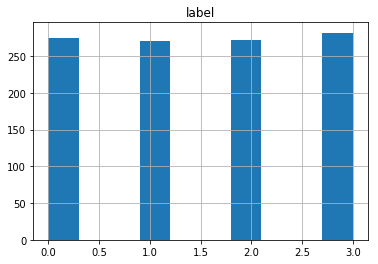

In [12]:
hist_df.hist('label')

analyze the X and y shape

In [13]:
#4D batch size, height, width and channels
print('Shape of train imag is:', X.shape)

#1D
print('Shape of train imag is:', y.shape)

Shape of train imag is: (1100, 64, 64, 3)
Shape of train imag is: (1100,)


splitting data arrays into two subsets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state =2
)

In [16]:
del X
del y
gc.collect()

0

In [17]:
ntrain = len(X_train)
nval = len(X_val)

In [18]:
batch_size =32

begin create the model

In [19]:
from keras import layers, models, optimizers

Using TensorFlow backend.


In [20]:
from keras.preprocessing.image import (
    img_to_array,
    load_img,
    ImageDataGenerator
)

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'relu'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)        

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=1e-4),metrics = ['acc'])

In [24]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
train_generator = train_datagen.flow(X_train,y_train,batch_size = batch_size)
val_generator = val_datagen.flow(X_val,y_val,batch_size = batch_size)


In [43]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = ntrain // batch_size,
    epochs = 20,
    validation_data = val_generator,
    validation_steps = nval // batch_size
)

Epoch 1/20
27/27 [==============================] - 5s 172ms/step - loss: -8.1455 - acc: 0.0000e+00 - val_loss: -9.0542 - val_acc: 0.0000e+00
Epoch 2/20
26/27 [===========================>..] - ETA: 0s - loss: -8.1089 - acc: 0.0000e+00

KeyboardInterrupt: 

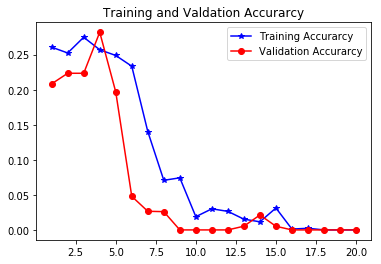

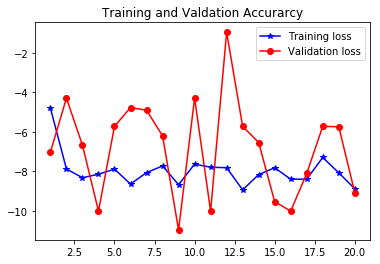

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'*-b',label = 'Training Accurarcy')
plt.plot(epochs,val_acc,'o-r',label = 'Validation Accurarcy')
plt.title('Training and Valdation Accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'*-b',label = 'Training loss')
plt.plot(epochs,val_loss,'o-r',label = 'Validation loss')
plt.title('Training and Valdation Accurarcy')
plt.legend()

plt.show()

As the epoch increased has a decrease in the accuracy of the data, then no need to increase the number of seasons.

# Attempt 2 - Image classification fom scikit-learn (tree classification)

In [28]:
train_imgs = pd.read_csv('./train.csv')

In [29]:
def read_and_process_image(lista_img,lista_lab):
    
    
    X = []
    y =[]
    
    for image,label in zip(lista_img,lista_lab):
        
        X.append(mpimg.imread('./train/'+image))# Ler imagem em vetor
        
        # Change string to int (upright = 0, right = 1, left = 2, upside down =3)
        if 'upright' in label:
            y.append(0)
        elif 'rotated_right' in label:
            y.append(1)
        elif 'rotated_left' in label:
            y.append(2)
        elif 'upside_down' in label:
            y.append(3)
        else:
            y.append(None)
    return X,y

In [30]:

#PEguei 100 imagens no ínicio
X,y = read_and_process_image(train_imgs['fn'][0:100],train_imgs['label'][0:100])

X = np.array(X)
y = np.array(y)

In [31]:
del train_imgs
gc.collect()

2628

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier(
    max_depth=1000, # número de perguntas
    random_state=0,
)

#tree.fit(X[0][0][0].reshape(1, -1) ,y[0].reshape(-1, 1) )


"""
#Training the Model Tree
for i in range(0,len(X[0])):
    for j in range(0,len(X[0])):
        tree.fit(X[:,i][:,j],y )
        if tree.score(X[:,i][:,j],y) > 0.9:
            print('score',str(tree.score(X[:,i][:,j],y)),' i:',i,' j:',j)"""
        
tree.fit(X[:,9][:,44],y )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
tree.score(X[:,9][:,44] ,y)

1.0

In [35]:
local = os.getcwd()
os.chdir('./test')

In [36]:
def read_and_process_image(lista_img,lista_lab,local):    
    X = []
    y =[]
    
    for image,label in zip(lista_img,lista_lab):
        
        local_img = "./%s/%s"%(local,image)
        X.append(mpimg.imread(local_img))# Ler imagem em vetor
        
        if 'upright' in label:
            y.append(0)
        elif 'rotated_right' in label:
            y.append(1)
        elif 'rotated_left' in label:
            y.append(2)
        elif 'upside_down' in label:
            y.append(3)
        else:
            y.append(4)
    return X,y

In [37]:
train_imgs = [[],[]]


for arquivo in os.listdir('.'):
    if arquivo[len(arquivo)-4:] == '.jpg':
        train_imgs[0].append(arquivo)
        train_imgs[1].append('x')

train_imgs_df = pd.DataFrame()
train_imgs_df['fn'], train_imgs_df['label'] = train_imgs

os.chdir(local)

In [38]:
#PEguei 100 imagens no ínicio
X_test,y_test = read_and_process_image(train_imgs_df['fn'][0:100],train_imgs_df['label'][0:100],'test')

X_test = np.array(X_test)
y_test = np.array(y_test)

del train_imgs
gc.collect()

28

In [39]:
tree.score(X_test[:,9][:,44] ,y)

0.24

In [40]:
pred = tree.predict(X_test[:,0][:,0])

dfy = pd.DataFrame()
dfy['pred_label'] = pred
dfy['label'] = y


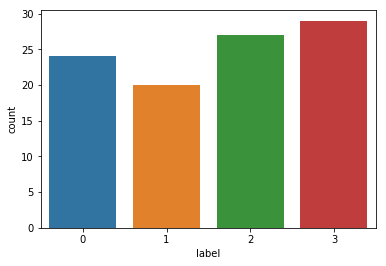

In [41]:
import seaborn as sns
sns.countplot(data =dfy,x ='label')

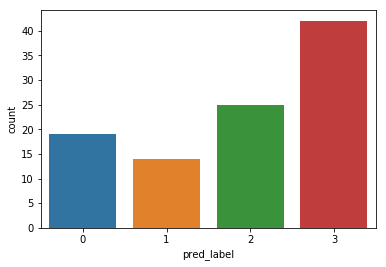

In [42]:
sns.countplot(data =dfy,x ='pred_label')